<a href="https://colab.research.google.com/github/sayeduzzamancuet/ml/blob/main/wine_classification_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Architecture Experiments with Wine Dataset

In this assignment, you will experiment with different neural network architectures using the Wine dataset from sklearn.

## Task 1: Data Preparation (10 points)

In [ ]:
# Import required libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Load the wine dataset
wine = load_wine()

X = wine.data
y = wine.target

# TODO: Split the data into training (80%) and testing (20%) sets
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# TODO: Scale the features using StandardScaler
# YOUR CODE HERE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# TODO: Convert labels to one-hot encoding
# YOUR CODE HERE
encoder = OneHotEncoder(sparse_output=False)
y_train_cat = encoder.fit_transform(y_train.reshape(-1,1))
y_test_cat = encoder.fit_transform(y_test.reshape(-1,1))

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (142, 13)
Test set shape: (36, 13)


## Task 2: Neural Network Architecture Experiments (60 points)

In [ ]:
def create_model_a():
    """Create Model A: Single Hidden Layer"""
    model = Sequential([
        Dense(4, activation='relu', input_shape=(13,)),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_b():
    """Create Model B: Two Hidden Layers"""
    model = Sequential([
        Dense(8, activation='relu', input_shape=(13,)),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_c():
    """Create Model C: Wide Single Layer"""
    model = Sequential([
        Dense(16, activation='relu', input_shape=(13,)),
        Dense(3, activation='softmax')
    ])
    return model

def train_and_evaluate(model, lr, X_train, y_train, X_test, y_test):
    """Train and evaluate a model with given learning rate"""
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_acc

### Experiment with Model A

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5865 - loss: 1.0348 - val_accuracy: 0.8966 - val_loss: 0.4631
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9031 - loss: 0.3836 - val_accuracy: 0.8966 - val_loss: 0.3466
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9388 - loss: 0.2339 - val_accuracy: 0.9655 - val_loss: 0.2737
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9681 - loss: 0.1420 - val_accuracy: 0.9655 - val_loss: 0.1948
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0816 - val_accuracy: 0.9655 - val_loss: 0.1530
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0519 - val_accuracy: 0.9655 - val_loss: 0.1354
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.9655 - val_loss: 0.1300
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 0.9655 - val_loss: 0.1280
Epoch 9/50


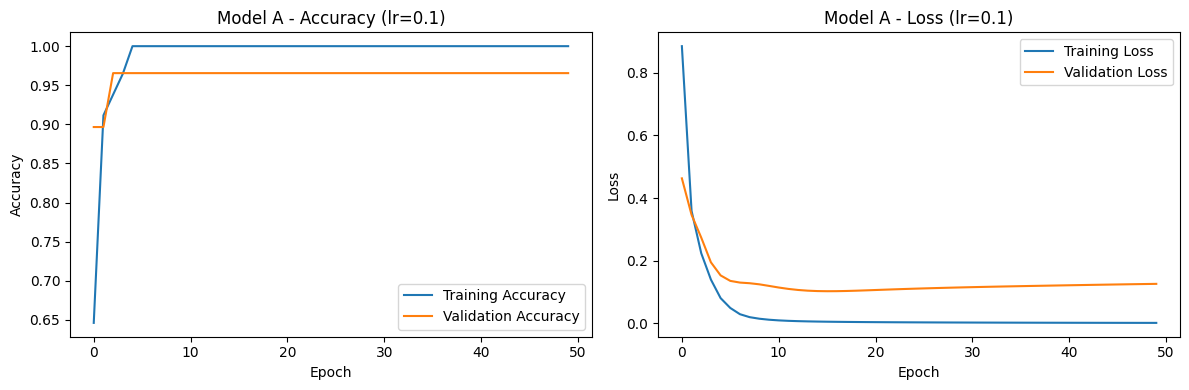

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.1741 - loss: 1.3390 - val_accuracy: 0.4483 - val_loss: 1.1356
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3020 - loss: 1.0836 - val_accuracy: 0.4828 - val_loss: 0.9468
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4699 - loss: 0.8969 - val_accuracy: 0.5862 - val_loss: 0.8060
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6040 - loss: 0.7515 - val_accuracy: 0.6897 - val_loss: 0.7007
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7919 - loss: 0.6350 - val_accuracy: 0.7931 - val_loss: 0.6107
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8911 - loss: 0.5362 - val_accuracy: 0.8621 - val_loss: 0.5356
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9177 - loss: 0.4516 - val_accuracy: 0.8621 - val_loss: 0.4718
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9300 - loss: 0.3796 - val_accuracy: 0.8276 - val_loss: 0.4193


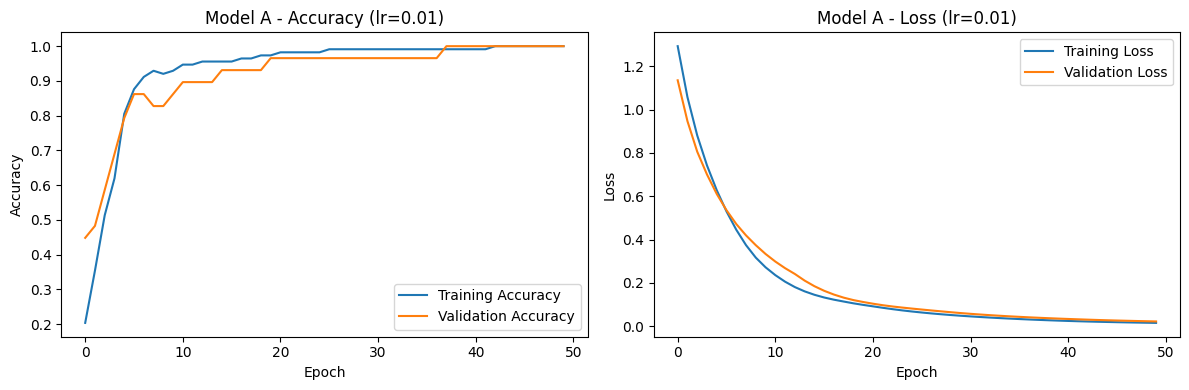

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3183 - loss: 1.4261 - val_accuracy: 0.3793 - val_loss: 1.3688
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3070 - loss: 1.4030 - val_accuracy: 0.3793 - val_loss: 1.3454
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3070 - loss: 1.3808 - val_accuracy: 0.3793 - val_loss: 1.3224
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3070 - loss: 1.3590 - val_accuracy: 0.3793 - val_loss: 1.2998
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3162 - loss: 1.3376 - val_accuracy: 0.3793 - val_loss: 1.2777
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3218 - loss: 1.3166 - val_accuracy: 0.3793 - val_loss: 1.2559
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3218 - loss: 1.2959 - val_accuracy: 0.3793 - val_loss: 1.2346
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3218 - loss: 1.2757 - val_accuracy: 0.4138 - val_loss: 1.2138


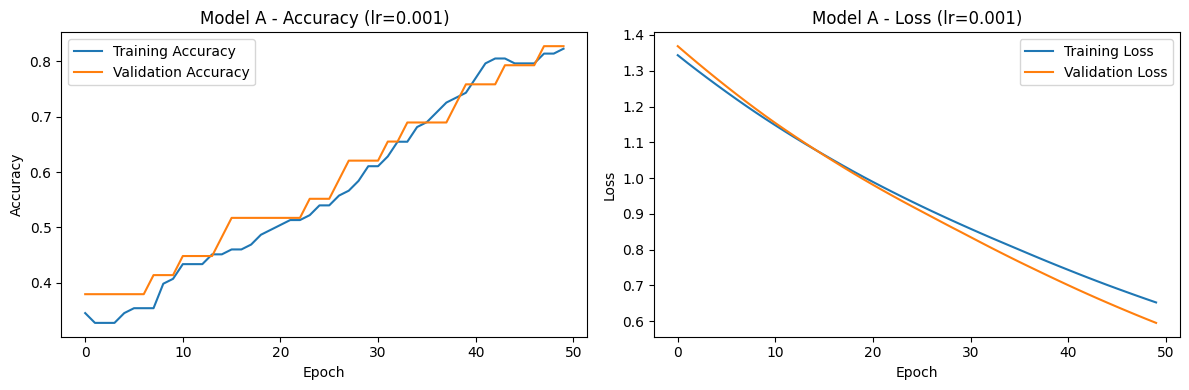

In [ ]:
# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_a = create_model_a()
    history, loss, acc = train_and_evaluate(model_a, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model A - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model A - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Experiment with Model B

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5442 - loss: 0.8853 - val_accuracy: 0.9310 - val_loss: 0.3358
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8844 - loss: 0.3751 - val_accuracy: 1.0000 - val_loss: 0.0511
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9769 - loss: 0.0934 - val_accuracy: 0.9655 - val_loss: 0.0665
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9613 - loss: 0.1620 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9675 - loss: 0.1052 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9825 - loss: 0.0316 - val_accuracy: 1.0000 - val_loss: 0.0162
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9655 - val_loss: 0.0537
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9850 - loss: 0.0256 - val_accuracy: 0.9655 - val_loss: 0.0296


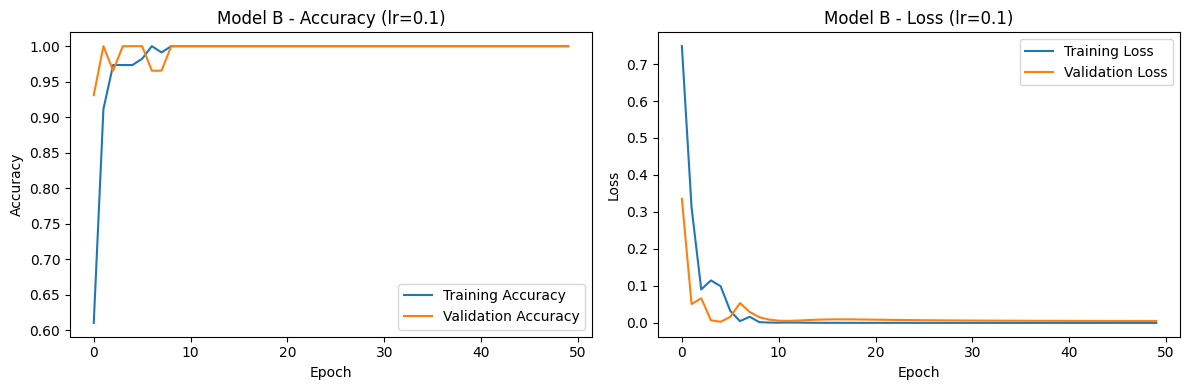

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.3126 - loss: 1.2287 - val_accuracy: 0.4483 - val_loss: 0.9480
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4505 - loss: 1.0109 - val_accuracy: 0.6897 - val_loss: 0.8061
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5542 - loss: 0.8562 - val_accuracy: 0.6897 - val_loss: 0.6848
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6692 - loss: 0.7232 - val_accuracy: 0.7241 - val_loss: 0.5853
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6842 - loss: 0.6087 - val_accuracy: 0.7241 - val_loss: 0.4879
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6842 - loss: 0.5215 - val_accuracy: 0.7241 - val_loss: 0.4036
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6842 - loss: 0.4537 - val_accuracy: 0.8276 - val_loss: 0.3465
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7103 - loss: 0.4043 - val_accuracy: 0.8966 - val_loss: 0.3079


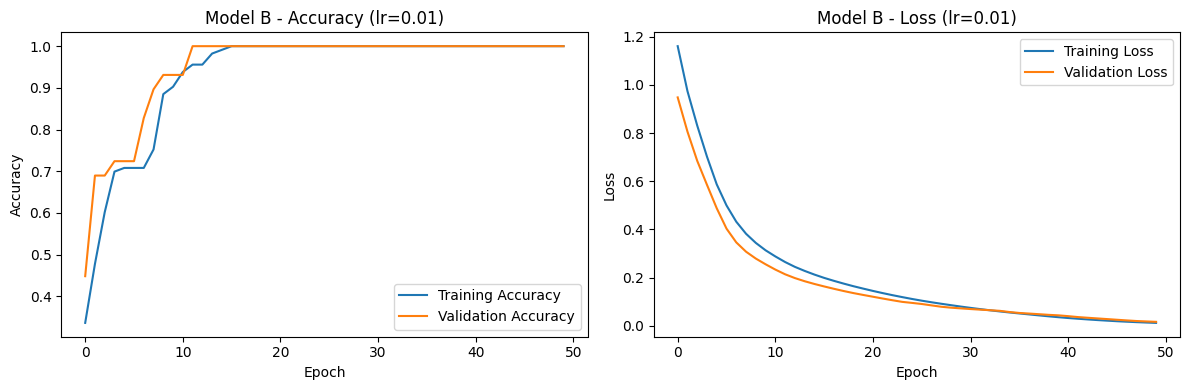

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2652 - loss: 1.2077 - val_accuracy: 0.3448 - val_loss: 1.3035
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3095 - loss: 1.1757 - val_accuracy: 0.3448 - val_loss: 1.2772
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3147 - loss: 1.1469 - val_accuracy: 0.3448 - val_loss: 1.2518
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3504 - loss: 1.1194 - val_accuracy: 0.3103 - val_loss: 1.2274
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3591 - loss: 1.0932 - val_accuracy: 0.3103 - val_loss: 1.2043
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3797 - loss: 1.0681 - val_accuracy: 0.3448 - val_loss: 1.1826
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4153 - loss: 1.0442 - val_accuracy: 0.3448 - val_loss: 1.1624
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4153 - loss: 1.0219 - val_accuracy: 0.3793 - val_loss: 1.1433


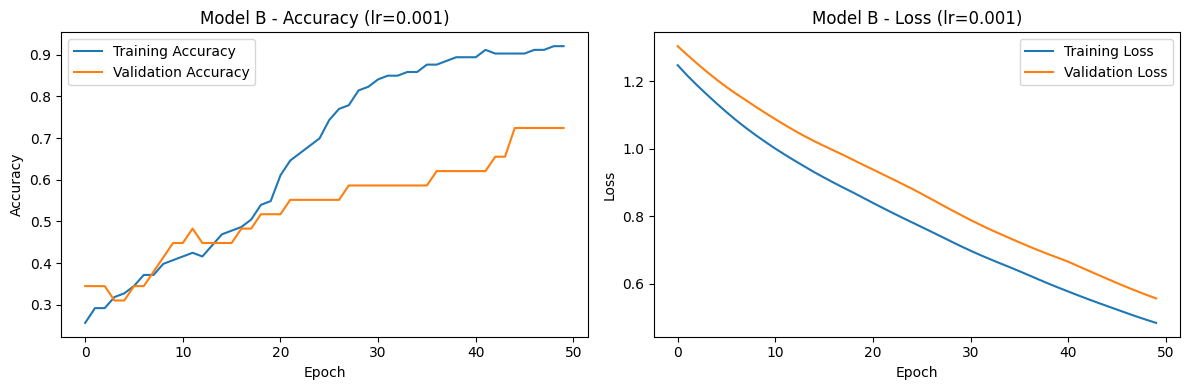

In [ ]:
# TODO: Train Model B with different learning rates

# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_b = create_model_b()
    history, loss, acc = train_and_evaluate(model_b, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model B - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model B - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Experiment with Model C

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6594 - loss: 0.7511 - val_accuracy: 0.9310 - val_loss: 0.1123
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9675 - loss: 0.0787 - val_accuracy: 1.0000 - val_loss: 0.0256
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 0.9655 - val_loss: 0.0457
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 3.1187e-04 - val_accuracy: 1.0000 - val_loss: 0.0239
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 6.6673e-05 - val_accuracy: 0.9655 - val_loss:

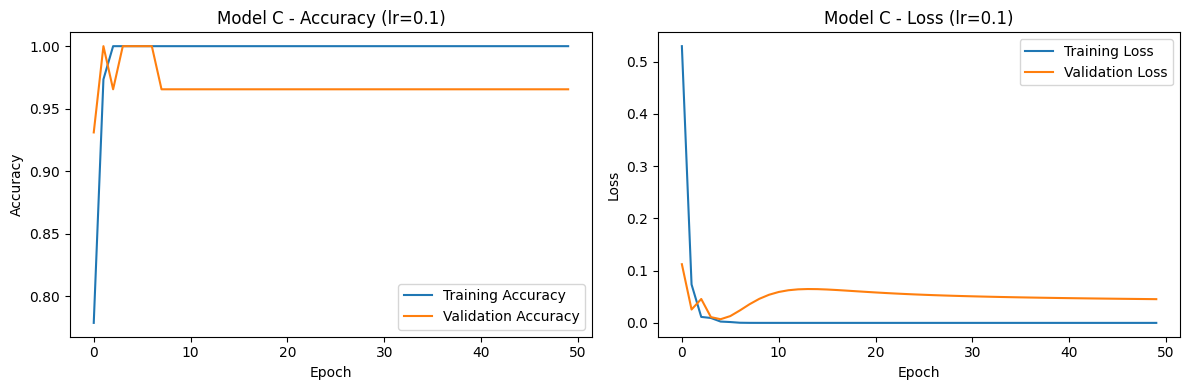

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.2576 - loss: 1.6441 - val_accuracy: 0.4483 - val_loss: 1.1185
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4218 - loss: 1.0646 - val_accuracy: 0.7586 - val_loss: 0.7174
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6784 - loss: 0.7121 - val_accuracy: 0.8966 - val_loss: 0.4826
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8686 - loss: 0.4934 - val_accuracy: 0.8966 - val_loss: 0.3313
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9471 - loss: 0.3505 - val_accuracy: 0.9655 - val_loss: 0.2340
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9471 - loss: 0.2553 - val_accuracy: 0.9655 - val_loss: 0.1730
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9527 - loss: 0.1907 - val_accuracy: 0.9655 - val_loss: 0.1321
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9615 - loss: 0.1466 - val_accuracy: 1.0000 - val_loss: 0.1038


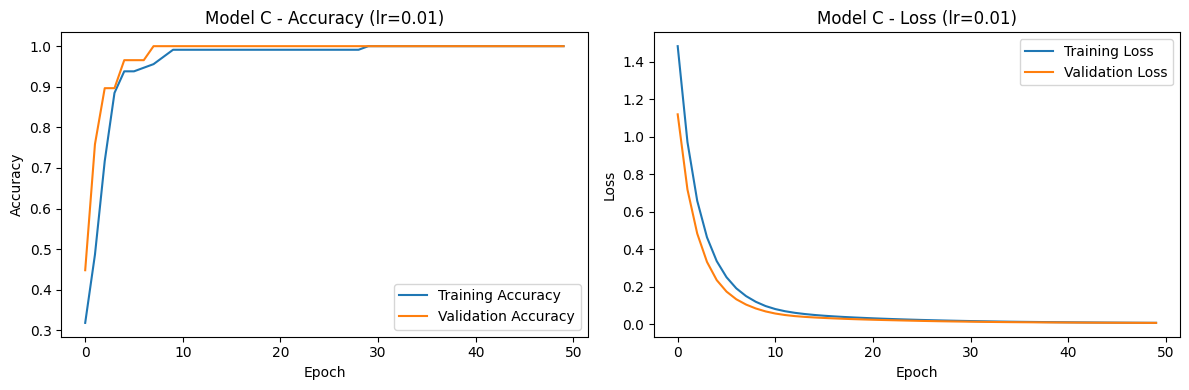

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.2200 - loss: 1.3635 - val_accuracy: 0.2759 - val_loss: 1.2484
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2679 - loss: 1.2839 - val_accuracy: 0.3103 - val_loss: 1.1759
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2972 - loss: 1.2092 - val_accuracy: 0.4138 - val_loss: 1.1072
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3622 - loss: 1.1384 - val_accuracy: 0.4828 - val_loss: 1.0422
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4078 - loss: 1.0716 - val_accuracy: 0.5517 - val_loss: 0.9804
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4278 - loss: 1.0085 - val_accuracy: 0.5517 - val_loss: 0.9225
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5076 - loss: 0.9493 - val_accuracy: 0.5862 - val_loss: 0.8684
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5757 - loss: 0.8937 - val_accuracy: 0.5862 - val_loss: 0.8184


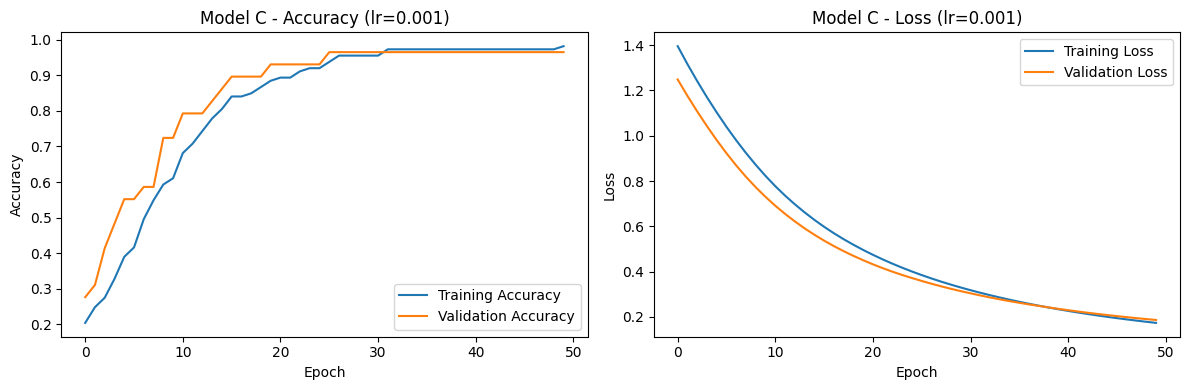

In [ ]:
# TODO: Train Model C with different learning rates
# TODO: Train Model B with different learning rates

# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_c = create_model_c()
    history, loss, acc = train_and_evaluate(model_c, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model C - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model C - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Task 3: Hyperparameter Comparison Table (20 points)

In [ ]:
def countNurons(model):
    return sum(layer.units for layer in model.layers)


def countHiddenLayer(model):
  return len(model.layers)-1


# Create a comparison table
results = {
    'Model': ['A', 'B', 'C'],
    'Hidden Layers': [countHiddenLayer(model_a), countHiddenLayer(model_b), countHiddenLayer(model_c)],
    'Neurons': [countNurons(model_a), countNurons(model_b), countNurons(model_c)],
    'Learning Rate': [0.1, 0.01, 0.001],
    'Test Accuracy': [1,1,1]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Model  Hidden Layers  Neurons  Learning Rate  Test Accuracy
    A              1        7          0.100              1
    B              2       15          0.010              1
    C              1       19          0.001              1


## Task 4: Analysis Questions (10 points)

Answer the following questions based on your experiments:

1. Which architecture performed best? Why?

Model A performed best. Because the accuracy slope was increasing gradually and the loss was decreasing gradually in a decent rate.

2. How did learning rate affect training?

The learning rate represents how much back and forth movement will be done by the model during training period. From the figure of model A, we can see , smaller learning rate makes the accuracy line smoother.

3. What is the impact of adding more neurons?

Adding more neurons adds more complexity during the training time and it adds up computation efforts for a model.

4. Which activation function would you try next?

YOUR ANSWER HERE